In [5]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings('ignore')

### 실습 1 - t 분포

In [2]:
t = 2
df = 100  #자유도

prob = stats.t.cdf(t,df)
print('P(T<=t):{:.3f}'.format(prob))

P(T<=t):0.976


### 실습 2 - x^2 분포

In [3]:
chisq = 3
df = 8

prob = stats.chi2.cdf(chisq,df)
print('P(X<={0}):{1:.4f}'.format(chisq,prob))

P(X<=3):0.0656


### 실습 3 - f 분포

In [4]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f, dfn = dfnum, dfd= dfden )
print('P(X<=F):{:.3f}'.format(prob))

P(X<=F):0.850


### 실습 4 - 이항분포

In [5]:
n = 5 
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print('P(X={0}) = {1:.3f}'.format(i,prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


### 실습  5 - 정규성 검정

In [6]:
ds_camshaft = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/2sample_t_test.csv')
ds_camshaft.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [7]:
df = ds_camshaft.dropna()
data1 = df['Mat_A']
stats.shapiro(data1)

ShapiroResult(statistic=0.906264066696167, pvalue=0.2563020884990692)

#### 가설 검정

- H0 : Mat_A 자료의 분포는 정규분포를 따른다.
- H1 : Mat_A 자료의 분포는 정규분포를 따르지 않는다.

p-value 값이 0.25 이므로, 유의 수준 5%에서 귀무가설을 채택할 수 있다. 따라서, 유의 수준 5% 에서 자료의 분포는 정규분포를 따른다고 볼 수 있다.

In [8]:
df = ds_camshaft.dropna()
data1 = df['Mat_B']
stats.shapiro(data1)

ShapiroResult(statistic=0.9729753732681274, pvalue=0.9169775247573853)

#### 가설 검정

- H0 : Mat_B 자료의 분포는 정규분포를 따른다.
- H1 : Mat_B 자료의 분포는 정규분포를 따르지 않는다.

p-value 값이 0.91 이므로, 유의 수준 5%에서 귀무가설을 채택할 수 있다. 따라서, 유의 수준 5% 에서 자료의 분포는 정규분포를 따른다고 볼 수 있다.

### 실습 6 - 모평균 구간추정

In [9]:
df = pd.DataFrame({"sample": [18,18,20,21,20,23,19,18,17,21,
                             22,20,20,21,20,19,19,18,17,19]})
df.head()

,sample
0,18
1,18
2,20
3,21
4,20


In [10]:
# 표준편차 3.8
# n = 20

lower,upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 3.8/np.sqrt(20))
print("신뢰구간 : ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([17.83],[21.17])


### 실습 7 - 모평균 신뢰구간 추정 (모표준편차 모르는 경우)

In [11]:
df = pd.DataFrame({"sample": [73,71,74,69,70,73,70,68,75,72,
                             70,72,73,70,70,72,71,70,75,72]})
df.head()

,sample
0,73
1,71
2,74
3,69
4,70


In [12]:
lower,upper = stats.t.interval(0.95, len(df)-1 ,loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간 : ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([70.6],[72.4])


### 실습 8 - 1 sample t-test

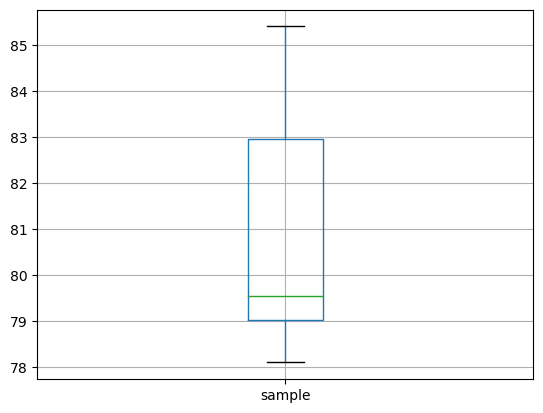

In [13]:
df = pd.DataFrame({'sample':[85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
df.boxplot(['sample'])
plt.show()

In [14]:
t_result = stats.ttest_1samp(df, 78.0)
t, p = t_result.statistic.round(3), \
    t_result.pvalue.round(3)

In [15]:
print('1-Sample t-test')
print('t 통계량 : {}'.format(t))
print('p-value : {}'.format(p))
print('평균 : ', np.mean(df))

1-Sample t-test
t 통계량 : [3.379]
p-value : [0.008]
평균 :  sample    80.93
dtype: float64


#### 실습 8 -가설검정

- H0 : 고객서비스센터의 고객만족도 평균은 78점이다. 
- H1 : 고객서비스센터의 고객만족도 평균은 78점이 아니다.

p-value 값이 0.008 이므로, 유의 수준 5%에서 귀무가설을 기각할 수 있다. 따라서, 유의 수준 5% 에서 고객서비스센터의 고객만족도 평균은 78점이 아니다라고 볼 수 있다.

개선활동을 완료한 후의 평균값은 80.93으로 개선활동이 만족도를 변화시켰다고 볼 수 있다.

### 실습 9 - 2 sample t-test

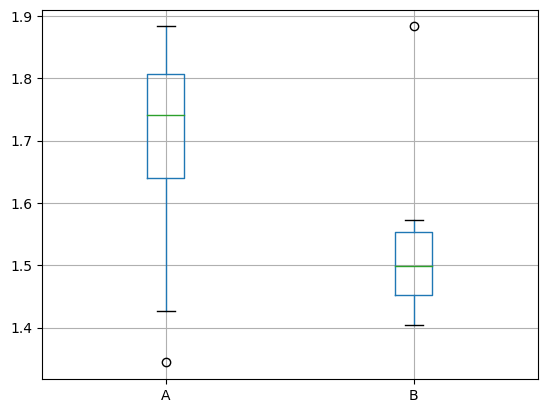

In [16]:
df = pd.DataFrame({'A' : [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                 'B' : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})
df.boxplot(['A','B'])
plt.show()

In [17]:
# A 정규성 검정 
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={},". format(statistic, p))

statistic=0.8425754904747009, p-value=0.08004532009363174,


#### A 정규성 검정

- H0 : 자료의 분포는 정규분포를 따른다.
- H1 : 자료의 분포는 정규분포를 따르지 않는다.

p-value 값이 0.08 이므로, 유의 수준 5%에서 귀무가설을 채택할 수 있다. 따라서, 유의 수준 5% 에서 자료의 분포는 정규분포를 따른다고 볼 수 있다.

In [18]:
# B 정규성 검정
statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={},". format(statistic, p))

statistic=0.7734811902046204, p-value=0.014793740585446358,


#### B 정규성 검정

- H0 : 자료의 분포는 정규분포를 따른다.
- H1 : 자료의 분포는 정규분포를 따르지 않는다.

p-value 값이 0.01 이므로, 유의 수준 5%에서 귀무가설을 기각한다. 따라서, 유의 수준 5% 에서 자료의 분포는 정규분포를 따르지 않는다고 볼 수 있다.

In [19]:
# 등분산성 검정
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=0.42411436523132123, pvalue=0.5148911629500761)

In [20]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['A'],df['B'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [21]:
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:1.7
p:0.111


#### 실습 9 -가설검정

- H0 : 공급자 간에 모평균 차이가 없다.
- H1 : 공급자 간에 모평균 차이가 있다.

p-value 값이 0.111 이므로, 유의 수준 5%에서 귀무가설을 채택할 수 있다. 따라서, 유의 수준 5% 에서 공급자 간에 모평균 차이가 없다고 볼 수 있다.

### 실습 10 - paired t-test

In [22]:
df1 = pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after':[710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

In [23]:
# t 검정
t_result = stats.ttest_rel(df1,df2)

In [24]:
t, p = t_result.statistic.round(4), t_result.pvalue.round(4)

In [25]:
print('Paired t-test')
print('t:{}'.format(t))
print('p-value:{}'.format(p))

Paired t-test
t:[-2.2661]
p-value:[0.0497]


#### 실습 10 -가설검정

- H0 : 회사원들의 성적은 학원가기 전후에 대해 차이가 없다. 
- H1 : 회사원들의 성적은 학원가기 전후에 대해 차이가 있다.

p-value 값이 0.0497 이므로, 유의 수준 5%에서 귀무가설을 기각할 수 있다. 따라서, 유의 수준 5% 에서 회사원들의 성적은 학원가기 전후에 대해 차이가 있다고 볼 수 있다.


### 실습 11 - 1 proportion test

In [26]:
count = 40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count, n_obs, value)

In [27]:
print('1 proportion test')
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(pval))

1 proportion test
z: -2.041
p: 0.041


#### 실습 11 -가설검정

- H0 : 동전을 던졌을 때 앞면과 뒷면의 나올 확률이 같다. (정상적인 동전)
- H1 : 동전을 던졌을 때 앞면과 뒷면의 나올 확률이 다르다. (비정상적인 동전)

p-value 값이 0.041 이므로, 유의 수준 5%에서 귀무가설을 기각할 수 있다. 따라서, 유의 수준 5% 에서 동전의 앞면과 뒷면의 나올 확률이 다른 비정상적인 동전이라고 볼 수 있다.

### 실습 12 - 2 proportion test

In [40]:
count = np.array([14,5])
nobs = np.array([1200,1200])

stat, pval = proportions_ztest(count, nobs)

In [41]:
print('2 proportion test')
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(pval))

2 proportion test
z: 2.073
p: 0.038


#### 실습 12 -가설검정

- H0 : 두 공정의 불량률에 차이가 없다.
- H1 : 두 공정의 불량률에 차이가 있다.

p-value 값이 0.038 이므로, 유의 수준 5%에서 귀무가설을 기각할 수 있다. 따라서, 유의 수준 5% 에서 두 공정의 불량률에 차이가 있다고 볼 수 있다.


### 실습 13 - 카이제곱 검정

In [30]:
df = pd.DataFrame({'A': [18, 1, 8, 7, 10, 9, 10], 'B': [8, 2, 14, 5, 5, 9, 4],
                  'C': [4, 1, 3, 4, 9, 5, 4], 'D': [4, 1, 2, 3, 2, 7, 3],
                  'E': [3, 1, 3, 1, 1, 1, 1], 'F': [3, 25, 8, 10, 2, 1, 7]})

chi, pval, dof, expected = stats.chi2_contingency(df)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p-value: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(1)))

chi-square test
chisq: 98.274
p-value: 0.000
degree pf freedom: 30
expected value: 
[[11.   8.2  5.2  3.8  1.9  9.8]
 [ 8.5  6.4  4.1  3.   1.5  7.6]
 [10.5  7.8  5.   3.7  1.8  9.3]
 [ 8.3  6.2  3.9  2.9  1.4  7.3]
 [ 8.   6.   3.8  2.8  1.4  7.1]
 [ 8.8  6.6  4.2  3.1  1.5  7.8]
 [ 8.   6.   3.8  2.8  1.4  7.1]]


#### 실습 13 -가설검정

- H0 : 각 제품에 대해 이미지 차이가 없다.
- H1 : 각 제품에 대해 이미지 차이가 있다.

p-value 값이 0.000 이므로, 유의 수준 5%에서 귀무가설을 기각할 수 있다. 
따라서, 유의 수준 5% 에서 각 제품에 대한 이미지 차이가 있다고 판단할 수 있다.


### 실습 14 - ANOVA

In [6]:
df_ANOVA = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/ANOVA.csv', encoding = 'euc-kr')
df_ANOVA.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


In [32]:
gangjong_a = df_ANOVA[df_ANOVA['gangjong'] == 'a']['time'].reset_index(drop=True)
gangjong_b = df_ANOVA[df_ANOVA['gangjong'] == 'b']['time'].reset_index(drop=True)
gangjong_c = df_ANOVA[df_ANOVA['gangjong'] == 'c']['time'].reset_index(drop=True)
gangjong_d = df_ANOVA[df_ANOVA['gangjong'] == 'd']['time'].reset_index(drop=True)

gangjong_df = pd.DataFrame({'gangjong_a': gangjong_a,
                            'gangjong_b': gangjong_b,
                            'gangjong_c': gangjong_c,
                            'gangjong_d': gangjong_d})
gangjong_df

,gangjong_a,gangjong_b,gangjong_c,gangjong_d
0,32.2,33.1,32.6,26.7
1,30.4,29.9,32.7,28.5
2,33.6,31.7,29.3,30.9
3,36.4,27.5,25.9,26.2
4,33.9,34.0,31.1,32.3
5,34.9,30.7,23.8,23.7


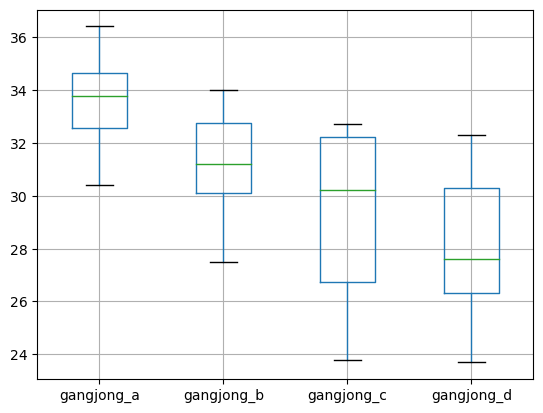

In [33]:
gangjong_df.boxplot(['gangjong_a','gangjong_b','gangjong_c','gangjong_d'])
plt.show()

In [34]:
# ANOVA 실행
f_result = stats.f_oneway(gangjong_df['gangjong_a'],gangjong_df['gangjong_b'],gangjong_df['gangjong_c'],gangjong_df['gangjong_d'])

f, p = f_result.statistic.round(3),f_result.pvalue.round(3)

In [35]:
print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way
F 통계량 : 4.172
p-value : 0.019


#### 실습 14 -가설검정1

- H0 : 강종별로 2차 정련시간의 차이가 없다
- H1 : 강종별로 2차 정련시간의 차이가 있다

p-value 값이 0.019 이므로, 유의 수준 5%에서 귀무가설을 기각할 수 있다. 따라서, 유의 수준 5% 에서 강종별로 2차 정련시간의 차이가 있다고 판단할 수 있다

In [36]:
type_a = df_ANOVA[df_ANOVA['type'] == 'a']['time'].reset_index(drop=True)
type_b = df_ANOVA[df_ANOVA['type'] == 'b']['time'].reset_index(drop=True)

type_df = pd.DataFrame({'type_a': type_a,
                            'type_b': type_b})
type_df

,type_a,type_b
0,32.2,32.6
1,30.4,32.7
2,33.6,29.3
3,36.4,25.9
4,33.9,31.1
5,34.9,23.8
6,33.1,26.7
7,29.9,28.5
8,31.7,30.9
9,27.5,26.2


In [37]:
# ANOVA 실행
f_result = stats.f_oneway(type_df['type_a'],type_df['type_b'])

f, p = f_result.statistic.round(3),f_result.pvalue.round(3)

In [38]:
print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way
F 통계량 : 9.654
p-value : 0.005


#### 실습 14 -가설검정2

- H0 : type별로 2차정련 시간에 차이가 없다.
- H1 : type별로 2차정련 시간에 차이가 있다.

p-value 값이 0.005 이므로, 유의 수준 5%에서 귀무가설을 기각할 수 있다. 
따라서, 유의 수준 5% 에서 type별로 2차정련 시간에 차이가 있다고 판단할 수 있다.

### 실습 15 - 상관분석

In [39]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

corr, pval = stats.pearsonr(df1, df2)

print('Correlation Analysis')
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr:-0.723
p-value:0.000


#### 실습 15 -가설검정

- H0 : 초코칩의 강도와 재료 반죽온도 사이의 상관계수는 0 이다.
- H1 : 초코칩의 강도와 재료 반죽온도 사이의 상관계수는 0 이 아니다.

p-value 값이 0.000 이므로, 유의 수준 5%에서 귀무가설을 기각할 수 있다. 따라서, 유의 수준 5% 에서 초코칩의 강도와 재료 반죽온도 사이의 상관계수는 0 이 아니라고 판단할 수 있다.

상관계수는 -0.723으로 초코칩의 강도와 재료 반죽온도 사이는 역의 상관관계를 가지고 있다고 볼 수 있다. 초코칩의 강도가 높아질수록 재료 반죽온도는 낮아지고, 초코칩의 강도가 낮아질수록 재료 반죽온도는 높아진다. 
